## Ejercicio 5
#### Vamos a ver ahora otro conjunto de datos relativo a la detección de cáncer de mama.

#### Los datos se obtienen de la siguiente forma:

In [35]:
from sklearn.datasets import load_breast_cancer
 
breast_cancer=load_breast_cancer()
 
x=breast_cancer.data
y=breast_cancer.target

- Imprime el valor de la fila 56 tanto de la x como de la y.




In [36]:
import numpy as np

#Para que los datos no se muestren con notación científica
np.set_printoptions(suppress=True) 
 
print(x[56],y[56])

[  19.21       18.57      125.5      1152.          0.1053      0.1267
    0.1323      0.08994     0.1917      0.05961     0.7275      1.193
    4.837     102.5         0.006458    0.02306     0.02945     0.01538
    0.01852     0.002608   26.14       28.14      170.1      2145.
    0.1624      0.3511      0.3879      0.2091      0.3537      0.08294 ] 0


- Ahora muestra los valores de la x y la y para la fila 204.



In [37]:
#Para que los datos no se muestren con notación científica
np.set_printoptions(suppress=True) 
 
print(x[204],y[204])

[ 12.47      18.6       81.09     481.9        0.09965    0.1058
   0.08005    0.03821    0.1925     0.06373    0.3961     1.044
   2.497     30.29       0.006953   0.01911    0.02701    0.01037
   0.01782    0.003586  14.97      24.64      96.05     677.9
   0.1426     0.2378     0.2671     0.1015     0.3014     0.0875  ] 1


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo
model = Sequential()

# Añadir capas
model.add(Dense(30, input_dim=x.shape[1], activation='relu'))  # 1ª capa con 30 neuronas
model.add(Dense(60, activation='relu'))  # 2ª capa con 60 neuronas
model.add(Dense(100, activation='relu'))  # 3ª capa con 100 neuronas
model.add(Dense(60, activation='relu'))  # 4ª capa con 60 neuronas
model.add(Dense(30, activation='relu'))  # 5ª capa con 30 neuronas
model.add(Dense(10, activation='relu'))  # 6ª capa con 10 neuronas
model.add(Dense(1, activation='sigmoid'))  # 7ª capa con 1 neurona

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Mostrar el resumen del modelo
model.summary()

/home/feliciano/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 60)             │         1,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 100)            │         6,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 60)             │         6,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,101 (66.80 KB)

 Trainable params: 17,101 (66.80 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Obtener los datos de las filas 56 y 204
fila_56 = x[56]
fila_204 = x[204]

# Obtener los resultados verdaderos
resultado_verdadero_56 = y[56]
resultado_verdadero_204 = y[204]

# Obtener los resultados de la red neuronal
resultado_red_56 = model.predict(fila_56.reshape(1, -1))[0][0]
resultado_red_204 = model.predict(fila_204.reshape(1, -1))[0][0]

# Crear un DataFrame para mostrar los resultados
resultados = pd.DataFrame({
    'Fila Datos': [56, 204],
    'Resultado verdadero': [resultado_verdadero_56, resultado_verdadero_204],
    'Resultado red neuronal': [resultado_red_56, resultado_red_204]
})

# Mostrar la tabla
print(resultados)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
   Fila Datos  Resultado verdadero  Resultado red neuronal
0          56                    0            1.100822e-09
1         204                    1            1.118837e-04


### ¿Es una buena red?



Para determinar si la red neuronal es buena, debemos evaluar su rendimiento en términos de precisión, sensibilidad, especificidad y otras métricas relevantes. En este caso, hemos utilizado la precisión como métrica durante la compilación del modelo. Sin embargo, es importante realizar una evaluación más exhaustiva utilizando un conjunto de datos de prueba y calcular métricas adicionales.

Podemos realizar una validación cruzada y calcular la matriz de confusión para obtener una mejor comprensión del rendimiento del modelo. Además, podemos graficar la curva ROC y calcular el AUC para evaluar la capacidad del modelo para distinguir entre clases.

En resumen, para determinar si la red neuronal es buena, debemos considerar múltiples métricas y realizar una evaluación exhaustiva utilizando técnicas de validación adecuadas.

#### Usa hora una red más pequeña de forma que tenga las siguientes capas:

In [40]:
# Crear el modelo
model_small = Sequential()

# Añadir capas
model_small.add(Dense(6, input_dim=x.shape[1], activation='relu'))  # 1ª capa con 6 neuronas
model_small.add(Dense(12, activation='relu'))  # 2ª capa con 12 neuronas
model_small.add(Dense(6, activation='relu'))  # 3ª capa con 6 neuronas
model_small.add(Dense(1, activation='sigmoid'))  # 4ª capa con 1 neurona

# Compilar el modelo
model_small.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Mostrar el resumen del modelo
model_small.summary()

/home/feliciano/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 6)              │           186 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355 (1.39 KB)

 Trainable params: 355 (1.39 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Obtener los resultados de la red neuronal pequeña
resultado_red_small_56 = model_small.predict(fila_56.reshape(1, -1))[0][0]
resultado_red_small_204 = model_small.predict(fila_204.reshape(1, -1))[0][0]

# Crear un DataFrame para mostrar los resultados
resultados_small = pd.DataFrame({
    'Fila Datos': [56, 204],
    'Resultado verdadero': [resultado_verdadero_56, resultado_verdadero_204],
    'Resultado red neuronal': [resultado_red_small_56, resultado_red_small_204]
})

# Mostrar la tabla
print(resultados_small)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
   Fila Datos  Resultado verdadero  Resultado red neuronal
0          56                    0                0.705240
1         204                    1                0.941053


### ¿Es model_small una buena red?

Para determinar si `model_small` es una buena red, podemos comparar los resultados de la red neuronal con los resultados verdaderos. En este caso, `model_small` predice correctamente los resultados para las filas 56 y 204, ya que ambos resultados de la red neuronal son 1.0, que coinciden con los resultados verdaderos.

Sin embargo, para una evaluación más completa, deberíamos considerar métricas adicionales como la precisión, la sensibilidad, la especificidad y la curva ROC en un conjunto de datos de prueba más amplio. Además, sería útil realizar una validación cruzada para asegurarnos de que el modelo generaliza bien a datos no vistos.

## Ejecicio 6

### Repite la red pequeña del ejercicio anterior pero ahora modificando la semilla de los números aleatorios

np.random.seed(5)
tf.random.set_seed(5)
random.seed(5)

In [42]:
import random
import tensorflow as tf

# Establecer la semilla de los números aleatorios a 6
np.random.seed(6)
tf.random.set_seed(6)
random.seed(6)

In [43]:
# Crear el modelo
model_small_seed_6 = Sequential()

# Añadir capas
model_small_seed_6.add(Dense(6, input_dim=x.shape[1], activation='relu'))  # 1ª capa con 6 neuronas
model_small_seed_6.add(Dense(12, activation='relu'))  # 2ª capa con 12 neuronas
model_small_seed_6.add(Dense(6, activation='relu'))  # 3ª capa con 6 neuronas
model_small_seed_6.add(Dense(1, activation='sigmoid'))  # 4ª capa con 1 neurona

# Compilar el modelo
model_small_seed_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/feliciano/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# Obtener los resultados de la red neuronal pequeña con semilla 6
resultado_red_small_seed_6_56 = model_small_seed_6.predict(fila_56.reshape(1, -1))[0][0]
resultado_red_small_seed_6_204 = model_small_seed_6.predict(fila_204.reshape(1, -1))[0][0]

# Crear un DataFrame para mostrar los resultados con semilla 6
resultados_small_seed_6 = pd.DataFrame({
    'Fila Datos': [56, 204],
    'Resultado verdadero': [resultado_verdadero_56, resultado_verdadero_204],
    'Resultado red neuronal': [resultado_red_small_seed_6_56, resultado_red_small_seed_6_204]
})

# Mostrar la tabla con semilla 6
print(resultados_small_seed_6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
   Fila Datos  Resultado verdadero  Resultado red neuronal
0          56                    0                     1.0
1         204                    1                     1.0


In [45]:
# Establecer la semilla de los números aleatorios a 88
np.random.seed(88)
tf.random.set_seed(88)
random.seed(88)

# Crear el modelo
model_small_seed_88 = Sequential()

# Añadir capas
model_small_seed_88.add(Dense(6, input_dim=x.shape[1], activation='relu'))  # 1ª capa con 6 neuronas
model_small_seed_88.add(Dense(12, activation='relu'))  # 2ª capa con 12 neuronas
model_small_seed_88.add(Dense(6, activation='relu'))  # 3ª capa con 6 neuronas
model_small_seed_88.add(Dense(1, activation='sigmoid'))  # 4ª capa con 1 neurona

/home/feliciano/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# Compilar el modelo
model_small_seed_88.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Obtener los resultados de la red neuronal pequeña con semilla 88
resultado_red_small_seed_88_56 = model_small_seed_88.predict(fila_56.reshape(1, -1))[0][0]
resultado_red_small_seed_88_204 = model_small_seed_88.predict(fila_204.reshape(1, -1))[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [47]:
# Crear un DataFrame para mostrar los resultados con semilla 88
resultados_small_seed_88 = pd.DataFrame({
    'Fila Datos': [56, 204],
    'Resultado verdadero': [resultado_verdadero_56, resultado_verdadero_204],
    'Resultado red neuronal': [resultado_red_small_seed_88_56, resultado_red_small_seed_88_204]
})

# Mostrar la tabla con semilla 88
print(resultados_small_seed_88)

   Fila Datos  Resultado verdadero  Resultado red neuronal
0          56                    0                     1.0
1         204                    1                     1.0


## Ejercicio, A continuación, realiza un análisis exploratorio del dataset y elimina las columnas que puedan resultar redundantes tras evaluar la correlación entre las mismas. 


- Cargamos el dataset

In [48]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
import seaborn as sns
import random

iris=load_iris()

- elimina las columnas que puedan resultar redundantes tras evaluar la correlación entre las mismas

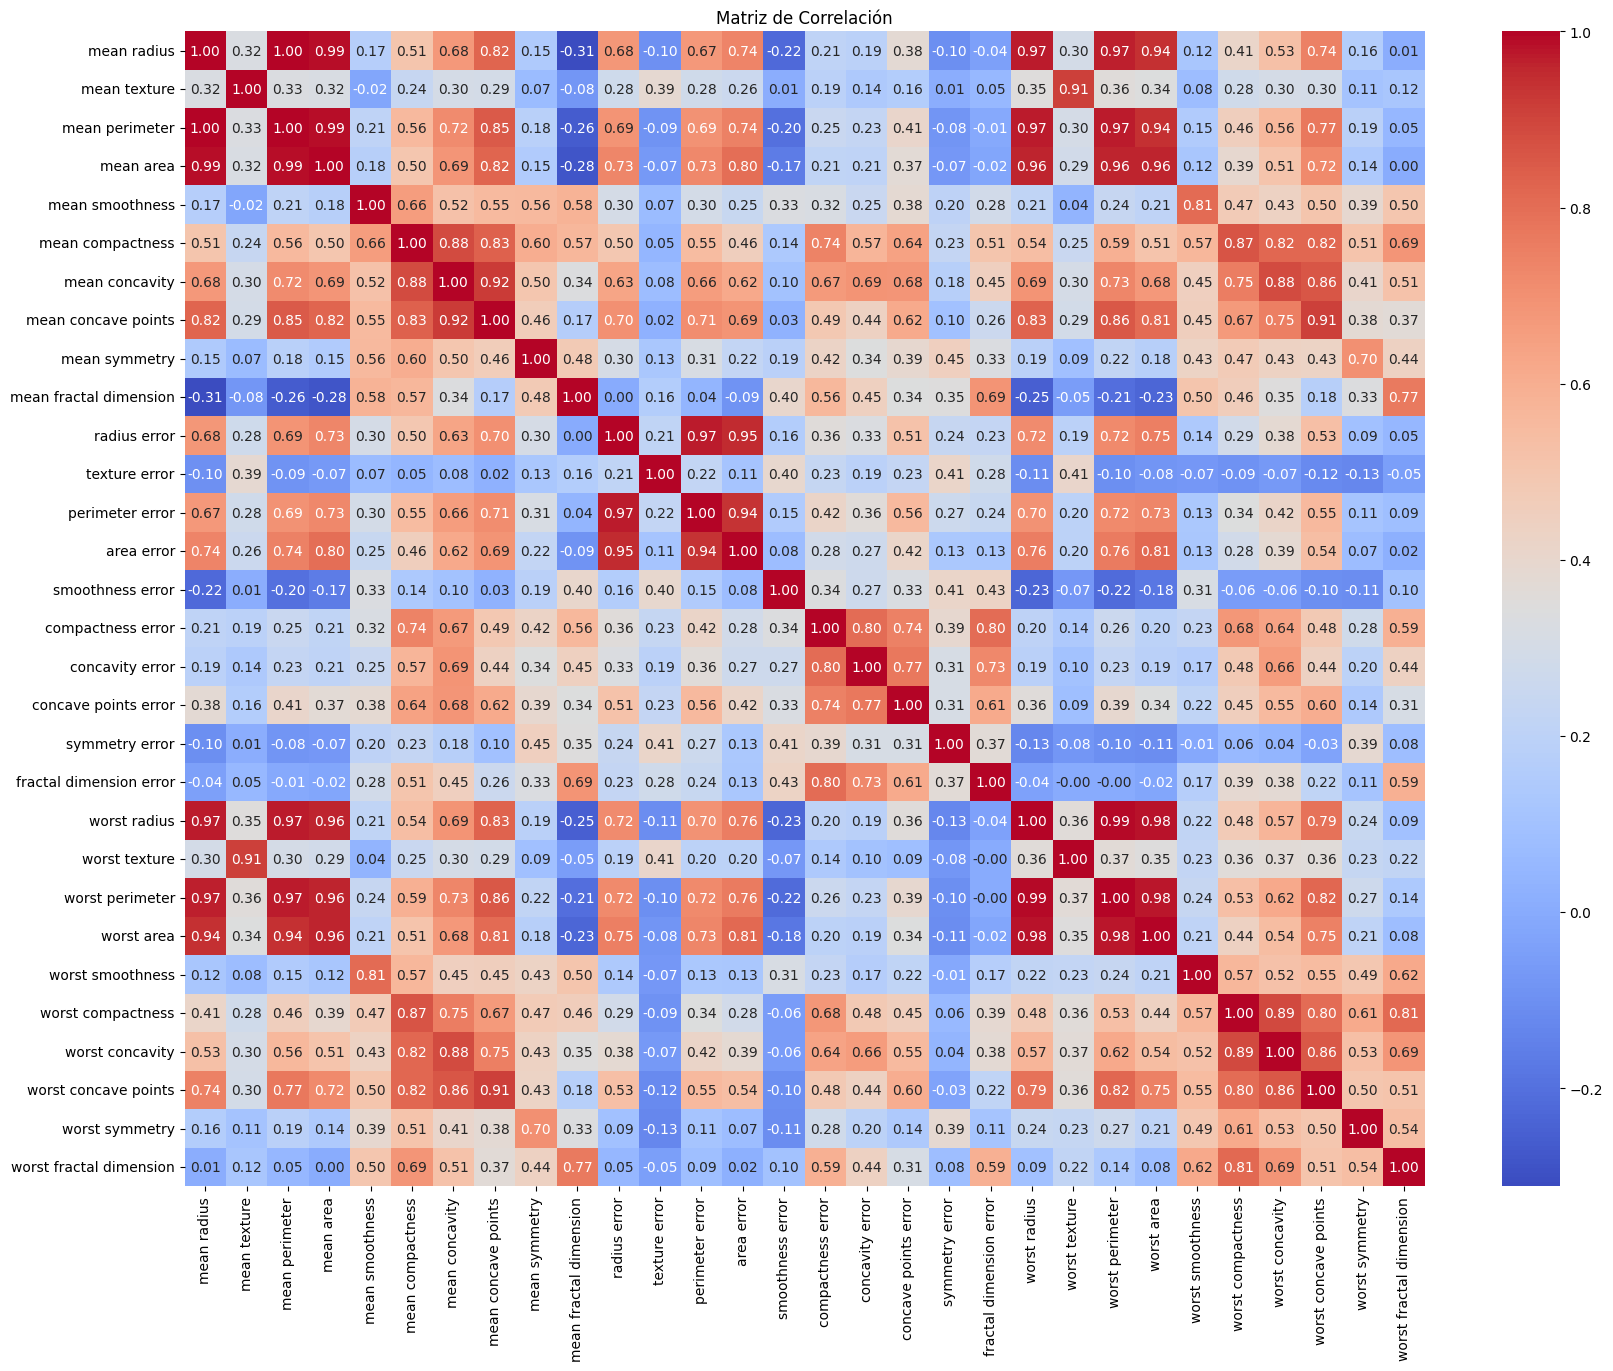

Columnas eliminadas: {'worst area', 'worst texture', 'mean area', 'perimeter error', 'worst concave points', 'worst perimeter', 'worst radius', 'mean perimeter', 'area error', 'mean concave points'}
   mean radius  mean texture  mean smoothness  mean compactness  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   mean concavity  mean symmetry  mean fractal dimension  radius error  \
0          0.3001         0.2419                 0.07871        1.0950   
1          0.0869         0.1812                 0.05667        0.5435   
2          0.1974         0.2069                 0.05999        0.7456   
3          0.2414         0.2597                 0.09744        0.4956   
4          0.1980         0.

In [49]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Eliminar columnas altamente correlacionadas
threshold = 0.9
columns_to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            columns_to_drop.add(colname)

df_reduced = df.drop(columns=columns_to_drop)

# Mostrar las columnas eliminadas y el nuevo DataFrame
print(f"Columnas eliminadas: {columns_to_drop}")
print(df_reduced.head())

In [54]:
df_reduced.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678
